In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/Users/krushna/Documents/CSV Files/Missing Data/Categorical Data/train-2.csv", usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [5]:
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [8]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [12]:
# we know that FireplaceQu, has 50% of missing values 
# And GarageQual has 5% of missign values

Text(0, 0.5, 'Number of Houses')

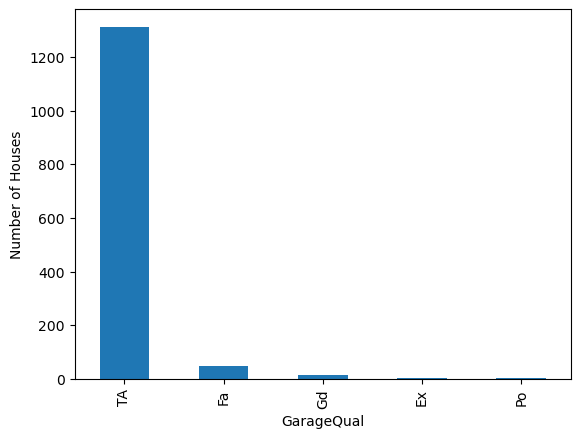

In [13]:
# Let's deal with GarageQual, as it has low mising values percentage 
# cHECK UNIQUE VALUES 
df['GarageQual'].value_counts().sort_values(ascending = False).plot.bar()
plt.xlabel("GarageQual")
plt.ylabel("Number of Houses")

Text(0.5, 1.0, 'GarageQual')

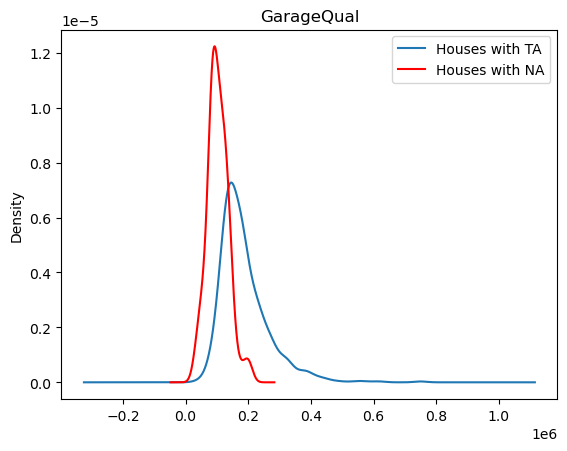

In [14]:
# Lets check TA compared to SalesPrice 
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

## We observe a gap beacuse of missing values 

In [17]:
# Let's impute 
temp = df[df['GarageQual'] == 'TA']['SalePrice']
temp.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [18]:
df['GarageQual'].fillna('TA', inplace=True)

In [23]:
#df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

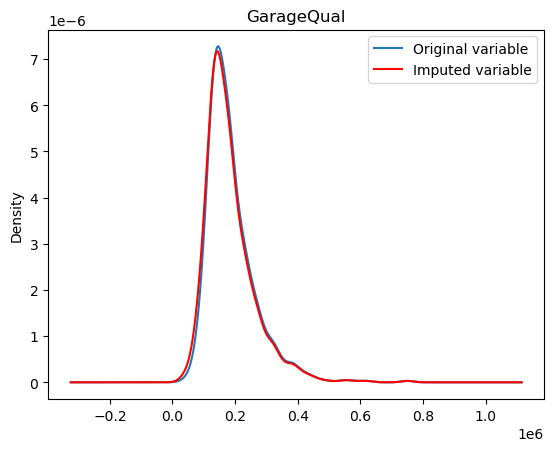

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

Imputation Works 